<h2> Predicting Customer Status at a Telecommunication Company</h2>

<b> By Michael Kumakech 001-001</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing 
%matplotlib inline


In [3]:
# download the data set
df = pd.read_csv("ChurnData (2).csv", encoding = "latin1")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.tail()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0
199,61.0,50.0,16.0,190.0,2.0,22.0,1.0,1.0,1.0,16.85,...,0.0,1.0,0.0,0.0,1.0,2.824,3.240,5.247,2.0,0.0


In [5]:
df2 =df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip', 'callcard', 'wireless','churn']]
df2.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [6]:
df2.tail()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,1.0
199,61.0,50.0,16.0,190.0,2.0,22.0,1.0,1.0,1.0,0.0


In [7]:
df2.shape

(200, 10)

<b> Spliting the data as dependent and independent variables</b>

In [8]:
# define X variables
X =np.asarray(df2[['tenure','age','address','income','ed', 'employ', 'equip','callcard','wireless']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.,   1.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.,   0.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.,   1.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.,   1.,   0.]])

In [9]:
y =np.asarray(df2[['churn']])
y[0:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

<h2> We Normalize the Data</h2>

In [10]:
from sklearn import preprocessing

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

<H2> Train/Test Split the data set<h2>

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)
print('train set:', X_train.shape,y_train.shape)
print('test set:',  X_test.shape, y_test.shape)

train set: (160, 9) (160, 1)
test set: (40, 9) (40, 1)


<h2> Modeling (Logistic Regression with Scikit-learn)</h2>

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
LR = LogisticRegression(C = 0.01, solver ='liblinear').fit(X_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
LR

LogisticRegression(C=0.01, solver='liblinear')

<h2> Prediction</h2>

In [17]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1.])

In [18]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

<h2> Evaluation</h2>

<b> Jacard Index</b>

In [19]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat)

0.36363636363636365

<b> Confusion Matrix</b>

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
#This function prints and plots the confusion matrix.
#Normalization can be applied by setting `normalize=True`.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


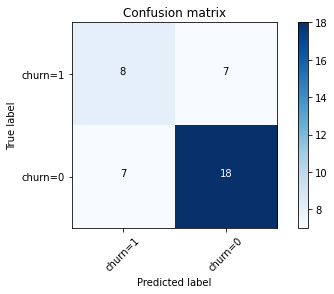

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize=False, title='Confusion matrix')

In [22]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        25
         1.0       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



<b> Log Loss</b>

In [23]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6155809757244557

<h2> Conclusion </h2>

Logistic Regression model is not accurate enough to predict the customer churn in a telecommunication industry since the weighted average in terms of accuray,precision, recall and F1-score is 0.65 ~ 65%

<b> Next we need to try Decission Trees</b>

<h2> Decision Trees</h2>

In [30]:
#Import main libaries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [31]:
# set up the DT
from sklearn.model_selection import train_test_split

In [32]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.2, random_state=3)

In [33]:
print('train set:', X_trainset.shape,y_trainset.shape)
print('test set:',  X_testset.shape, y_testset.shape)

train set: (160, 9) (160, 1)
test set: (40, 9) (40, 1)


<h2> Modeling using DT</h2>

In [34]:
# Create Entropy
customerTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
customerTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<h2> Prediction</h2>

In [35]:
customerTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
predTree =customerTree.predict(X_trainset)

In [37]:
print(predTree [0:5])
print(y_trainset [0:5])

[0. 1. 0. 1. 1.]
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]]


In [49]:
from sklearn import metrics

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
from sklearn.metrics import classification_report

In [52]:
# Write lineof codes that can produce the  output of Accuracy, Precision, Recall and F1-score values

Accuracy is  0.5873015873015873  F1 is 0.687462435388869
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.82       142
         1.0       0.55      0.57      0.56        58

    accuracy                           0.74       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.74      0.74      0.74       200



array([[115,  27],
       [ 25,  33]], dtype=int64)

<h2> Conclusion</h2>

In [ ]:
# Write your conclusion here
